# Machine Learning and AI for Autonomous Systems
## A program by IISc and TalentSprint
### Assignment : Multi Armed Bandits

## Learning Objectives

At the end of the experiment, you will be able to

* Epsilon Greedy algorithm
* UCB algorithm
* Exp3 Algorithm

### Setup Steps:

In [1]:
#@title Please enter your registration id to start: { run: "auto", display-mode: "form" }
Id = "2302794" #@param {type:"string"}

In [2]:
#@title Please enter your password (your registered phone number) to continue: { run: "auto", display-mode: "form" }
password = "9008710123" #@param {type:"string"}

In [3]:
#@title Run this cell to complete the setup for this Notebook
from IPython import get_ipython

ipython = get_ipython()

notebook= "AIAS_B2_M3_AST_02_Multi_Armed_Bandits_C" #name of the notebook

def setup():
#  ipython.magic("sx pip3 install torch")
    ipython.magic("sx wget https://files.grouplens.org/datasets/movielens/ml-25m.zip")
    ipython.magic("sx unzip ml-25m.zip")
    from IPython.display import HTML, display
    display(HTML('<script src="https://dashboard.talentsprint.com/aiml/record_ip.html?traineeId={0}&recordId={1}"></script>'.format(getId(),submission_id)))
    print("Setup completed successfully")
    return

def submit_notebook():
    ipython.magic("notebook -e "+ notebook + ".ipynb")

    import requests, json, base64, datetime

    url = "https://dashboard.talentsprint.com/xp/app/save_notebook_attempts"
    if not submission_id:
      data = {"id" : getId(), "notebook" : notebook, "mobile" : getPassword()}
      r = requests.post(url, data = data)
      r = json.loads(r.text)

      if r["status"] == "Success":
          return r["record_id"]
      elif "err" in r:
        print(r["err"])
        return None
      else:
        print ("Something is wrong, the notebook will not be submitted for grading")
        return None

    elif getAnswer() and getComplexity() and getAdditional() and getConcepts() and getComments() and getMentorSupport():
      f = open(notebook + ".ipynb", "rb")
      file_hash = base64.b64encode(f.read())

      data = {"complexity" : Complexity, "additional" :Additional,
              "concepts" : Concepts, "record_id" : submission_id,
              "answer" : Answer, "id" : Id, "file_hash" : file_hash,
              "notebook" : notebook,
              "feedback_experiments_input" : Comments,
              "feedback_mentor_support": Mentor_support}
      r = requests.post(url, data = data)
      r = json.loads(r.text)
      if "err" in r:
        print(r["err"])
        return None
      else:
        print("Your submission is successful.")
        print("Ref Id:", submission_id)
        print("Date of submission: ", r["date"])
        print("Time of submission: ", r["time"])
        print("View your submissions: https://aias-iisc.talentsprint.com/notebook_submissions")
        #print("For any queries/discrepancies, please connect with mentors through the chat icon in LMS dashboard.")
        return submission_id
    else: submission_id


def getAdditional():
  try:
    if not Additional:
      raise NameError
    else:
      return Additional
  except NameError:
    print ("Please answer Additional Question")
    return None

def getComplexity():
  try:
    if not Complexity:
      raise NameError
    else:
      return Complexity
  except NameError:
    print ("Please answer Complexity Question")
    return None

def getConcepts():
  try:
    if not Concepts:
      raise NameError
    else:
      return Concepts
  except NameError:
    print ("Please answer Concepts Question")
    return None


# def getWalkthrough():
#   try:
#     if not Walkthrough:
#       raise NameError
#     else:
#       return Walkthrough
#   except NameError:
#     print ("Please answer Walkthrough Question")
#     return None

def getComments():
  try:
    if not Comments:
      raise NameError
    else:
      return Comments
  except NameError:
    print ("Please answer Comments Question")
    return None


def getMentorSupport():
  try:
    if not Mentor_support:
      raise NameError
    else:
      return Mentor_support
  except NameError:
    print ("Please answer Mentor support Question")
    return None

def getAnswer():
  try:
    if not Answer:
      raise NameError
    else:
      return Answer
  except NameError:
    print ("Please answer Question")
    return None


def getId():
  try:
    return Id if Id else None
  except NameError:
    return None

def getPassword():
  try:
    return password if password else None
  except NameError:
    return None

submission_id = None
### Setup
if getPassword() and getId():
  submission_id = submit_notebook()
  if submission_id:
    setup()
else:
  print ("Please complete Id and Password cells before running setup")



Setup completed successfully


### Important Imports

Importing all the necessary imports required for this project.

In [4]:
! pip install ortools==9.7.2996

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 52.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.8/302.8 kB 28.3 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
      Successfully uninstalled protobuf-3.20.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-ai-generativelanguage 0.6.2 requires protobuf!=3.20.0,!=3.20.1,!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<5.0.0dev,>=3.19.5, but you have protobuf 5.26.1 which is incompatible.
google-api-core 2.11.1 requires protobuf!=3.20.0,!=3.20.1,!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<5.0.0.dev0,>=3.19.5, but you have protobuf 5.26.1 which is incompatible.
google-cloud-aiplatform 1.48.0 requires protobuf!=3.20.0,!=3.20.1,!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.2

In [5]:
! pip install protobuf==4.24.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.4/311.4 kB 2.3 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 5.26.1
    Uninstalling protobuf-5.26.1:
      Successfully uninstalled protobuf-5.26.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-metadata 1.15.0 requires protobuf<4.21,>=3.20.3; python_version < "3.11", but you have protobuf 4.24.2 which is incompatible.


In [6]:
! pip install pandas==1.4.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 29.7 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.0.3
    Uninstalling pandas-2.0.3:
      Successfully uninstalled pandas-2.0.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 1.4.0 requires pandas>=1.5.0, but you have pandas 1.4.0 which is incompatible.
google-colab 1.0.0 requires pandas==2.0.3, but you have pandas 1.4.0 which is incompatible.
plotnine 0.12.4 requires pandas>=1.5.0, but you have pandas 1.4.0 which is incompatible.


In [7]:
import numpy as np
import pandas as pd
from numpy.random import choice
import math
from matplotlib import pyplot as plt
import time
import random

# Libraries for combinatorial optimization
from ortools.constraint_solver import routing_enums_pb2
from ortools.constraint_solver import pywrapcp


import warnings
warnings.filterwarnings("ignore")

### What is a Multi-armed Bandit Problem?

Multi-armed bandits belong to a class of online learning algorithms that allocate a fixed number of resources to a set of competing choices, attempting to learn an optimal resource allocation policy over time.

So the idea is all simple. Given multiple slot machines, like the one shown above, the goal is to maximize the reward for a person pulling the lever of each machine randomly.

If you were given five slot machines and a limited number of turns to pull the lever, how would you determine maximum success?



### Download the MovieLens 25M dataset

This dataset includes roughly 25m movie ratings for 27,000 movies provided by 138,000 users of the University of Minnesota’s Movielens service.

To cast this dataset as a bandit problem, we’ll pretend that a user rated every movie that they saw, ignoring any sort of non-rating bias that may exist.

We define a rating of 4.5 stars or more as a “liked” movie, and anything else as a movie the user didn’t like. We modify the data and create a pseudo-timestamp value for each data point.

The end result is a dataset of roughly 6.5 million binary like/no-like movie ratings of the form:

[timestamp, userid, movieid, liked/not-liked]


# Preprocessing the Data


In [8]:
def read_movielens_25m(num_of_entries=100000):
    ratings = pd.read_csv('ml-25m/ratings.csv', nrows=num_of_entries)
    movies = pd.read_csv('ml-25m/movies.csv', engine='python', nrows=num_of_entries)
    links = pd.read_csv('ml-25m/links.csv', engine='python', nrows=num_of_entries)
    movies = movies.join(movies.genres.str.get_dummies().astype(bool))
    movies.drop('genres', inplace=True, axis=1)
    df = ratings.join(movies, on='movieId', how='left', rsuffix='_movie')
    return df

def preprocess_movielens_25m(df, min_number_of_reviews=100):
    # remove ratings of movies with < N ratings. too few ratings will cause the recsys to get stuck in offline evaluation
    movies_to_keep = pd.DataFrame(df['movieId'].value_counts())\
        .loc[pd.DataFrame(df['movieId'].value_counts())['movieId']>=min_number_of_reviews].index
  #  movies_to_keep = pd.DataFrame(df[df.groupby('movieId')['movieId'].transform('count') >= min_number_of_reviews])
    df = df.loc[df['movieId'].isin(movies_to_keep)]
    # shuffle rows to debias order of user ids
    df = df.sample(frac=1)
    # create a 't' column to represent time steps for the bandit to simulate a live learning scenario
    df['t'] = np.arange(len(df))
    df.index = df['t']
    # rating >= 4.5 stars is a 'like', < 4 stars is a 'dislike'
    df['liked'] = df['rating'].apply(lambda x: 1 if x >= 4.5 else 0)
    return df

"""def preprocess_movielens_25m(df, min_number_of_reviews=100):
    # Filter movies with >= N ratings
    movie_counts = df['movieId'].value_counts()
    valid_movie_ids = movie_counts[movie_counts >= min_number_of_reviews].index
    df = df[df['movieId'].isin(valid_movie_ids)]

    # Shuffle rows, add a time column, and create a 'liked' column
    df = df.sample(frac=1)
    df['t'] = np.arange(len(df))
    df.index = df['t']
    df['liked'] = df['rating'].apply(lambda x: 1 if x >= 4.5 else 0)

    return df"""

def get_ratings_25m():
    df = read_movielens_25m()
    df = preprocess_movielens_25m(df)
    return df

def replay_score(history, df, t, batch_size, recs):
    # reward if rec matches logged data, ignore otherwise
    actions = df[t:t+batch_size]
    actions = actions.loc[actions['movieId'].isin(recs)]
    actions['scoring_round'] = t
    # add row to history if recs match logging policy
    history = history.append(actions)
    action_liked = actions[['movieId', 'liked']]
    return history, action_liked

# simulation params: slate size, batch size (number of events per training iteration)
slate_size = 5
batch_size = 10

df = get_ratings_25m()
print ("Shape of the entries: ", df.shape)
print ("Column names: ", df.columns)

# initialize empty history
# (the algorithm should be able to see all events and outcomes prior to the current timestep, but no current or future outcomes)
history = pd.DataFrame(data=None, columns=df.columns)
#history = pd.concat([history, actions])
history = history.astype({'movieId': 'int32', 'liked': 'float'})

# initialize empty list for storing scores from each step
rewards = []

for t in range(df.shape[0]//batch_size):
    t = t * batch_size
    # generate recommendations from a random policy
    recs = np.random.choice(df.movieId.unique(), size=(slate_size), replace=False)
    # send recommendations and dataset to a scoring function so the model can learn & adjust its policy in the next iteration
    history, action_score = replay_score(history, df, t, batch_size, recs)
    if action_score is not None:
        action_score = action_score.liked.tolist()
        rewards.extend(action_score)

Shape of the entries:  (24491, 28)
Column names:  Index(['userId', 'movieId', 'rating', 'timestamp', 'movieId_movie', 'title',
       '(no genres listed)', 'Action', 'Adventure', 'Animation', 'Children',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir',
       'Horror', 'IMAX', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller',
       'War', 'Western', 't', 'liked'],
      dtype='object')


### Epsilon Greedy Algorithm

The epsilon greedy algorithm follows a greedy arm selection policy, selecting the best-performing arm at each time step. But, $\epsilon \%$  times it will go off-policy and choose an arm at random.

Running Epsilon Greedy Bandit with: batch size 10, slate size 5, epsilon 0.1


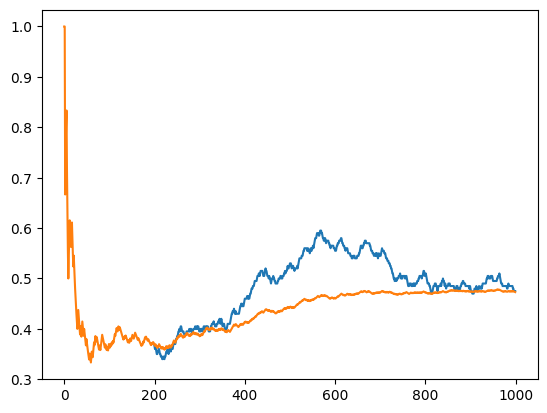

In [9]:
n = 5
epsilon = 0.1

def epsilon_greedy_policy(df, arms, epsilon=0.15, slate_size=5, batch_size=50):
    '''
    df: dataset to apply the policy to
    epsilon: float. represents the % of timesteps where we explore random arms
    slate_size: int. the number of recommendations to make at each step.
    batch_size: int. the number of users to serve these recommendations to before updating the bandit's policy.
    '''
    # draw a 0 or 1 from a binomial distribution, with epsilon% likelihood of drawing a 1
    explore = np.random.binomial(1, epsilon)
    # if explore: shuffle movies to choose a random set of recommendations
    if explore == 1 or df.shape[0]==0:
        recs = np.random.choice(arms, size=(slate_size), replace=False)
    # if exploit: sort movies by "like rate", recommend movies with the best performance so far
    else:
        scores = df[['movieId', 'liked']].groupby('movieId').agg({'liked': ['mean', 'count']})
        scores.columns = ['mean', 'count']
        scores['movieId'] = scores.index
        scores = scores.sort_values('mean', ascending=False)
        recs = scores.loc[scores.index[0:slate_size], 'movieId'].values
    return recs

print("Running Epsilon Greedy Bandit with: batch size {}, slate size {}, epsilon {}"\
	.format(batch_size, n, epsilon))

df = get_ratings_25m()

# initialize empty history
# (offline eval means you can only add to history when rec matches historic data)
history = pd.DataFrame(data=None, columns=df.columns)
history = history.astype({'movieId': 'int32', 'liked': 'float'})

# to speed this up, retrain the bandit every batch_size time steps
# this lets us measure batch_size actions against a slate of recommendations rather than generating
#      recs at each time step. this seems like the only way to make it through a large dataset like
#      this and get a meaningful sample size with offline/replay evaluation
rewards = []
max_time = df.shape[0] # total number of ratings to evaluate using the bandit
for t in range(max_time//batch_size): #df.t:
	t = t * batch_size

	# choose which arm to pull
	recs = epsilon_greedy_policy(df=history.loc[history.t<=t,], arms=df.movieId.unique(), epsilon=epsilon, slate_size=n, batch_size=batch_size)
	history, action_score = replay_score(history, df, t, batch_size, recs)
	if action_score is not None:
		action_score = action_score.liked.tolist()
		rewards.extend(action_score)




cumulative_avg = np.cumsum(rewards) / np.linspace(1, len(rewards), len(rewards))
plt.plot(pd.Series(rewards).rolling(200).mean(), label='epsilon')
plt.plot(cumulative_avg, label='epsilon')


### UCB1 (Upper Confidence Bound Algorithm)

Epsilon greedy performs well, but selecting arms at random can be inefficient. If you have one movie that 50% of users have liked, and another at 5% have liked, epsilon greedy is equally likely to pick either of these movies when exploring random arms. Upper Confidence Bound algorithms were introduced as a class of bandit algorithm that explores more efficiently.

Upper Confidence Bound algorithms construct a confidence interval of what each arm’s true performance might be, factoring in the uncertainty caused by variance in the data and the fact that we’re only able to observe a limited sample of pulls for any given arm. The algorithms then optimistically assume that each arm will perform as well as its upper confidence bound (UCB), selecting the arm with the highest UCB.



Running UCB Bandit with: batch size 10, slate size 5, ucb multiplier 1.5, bayesian: True
(24491, 28)
156
Running algorithm
finished in 80.28894805908203 seconds
0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
       ...  
761    0.435
762    0.435
763    0.440
764    0.435
765    0.440
Length: 766, dtype: float64
[0.         0.5        0.33333333 0.25       0.2        0.16666667
 0.14285714 0.25       0.22222222 0.2        0.18181818 0.16666667
 0.15384615 0.14285714 0.13333333 0.1875     0.17647059 0.16666667
 0.15789474 0.15       0.14285714 0.13636364 0.13043478 0.16666667
 0.16       0.15384615 0.14814815 0.14285714 0.13793103 0.13333333
 0.16129032 0.15625    0.15151515 0.14705882 0.14285714 0.13888889
 0.13513514 0.15789474 0.17948718 0.175      0.19512195 0.19047619
 0.18604651 0.18181818 0.17777778 0.17391304 0.17021277 0.1875
 0.20408163 0.22       0.21568627 0.23076923 0.24528302 0.25925926
 0.25454545 0.25       0.26315789 0.25862069 0.25423729 0.25
 0.24590

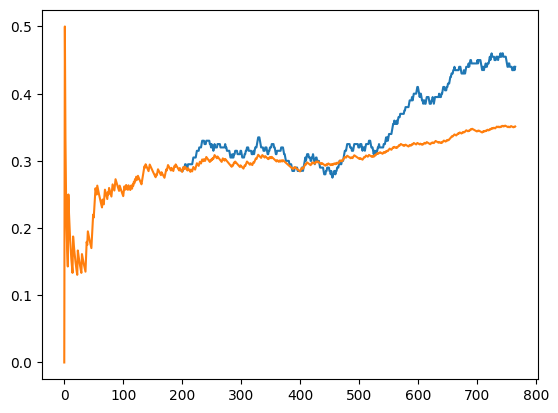

In [10]:
want_bayesian = True
n = 5
ucb_scale = 1.5
def ucb1_policy(df, t, ucb_scale=2.0):
	'''
	Applies UCB1 policy to generate movie recommendations
	args:
		df: dataframe. Dataset to apply UCB policy to.
		ucb_scale: float. Most implementations use 2.0.
		t: int. represents the current time step.
	'''
	scores = df[['movieId', 'liked']].groupby('movieId').agg({'liked': ['mean', 'count', 'std']})
	scores.columns = ['mean', 'count', 'std']
	if want_bayesian:
		scores['ucb'] = scores['mean'] + (ucb_scale * scores['std'] / np.sqrt(scores['count']))
	else:
		scores['ucb'] = scores['mean'] + np.sqrt(
				(
					(2 * np.log10(t)) /
					scores['count']
				)
			)
	scores['movieId'] = scores.index
	scores = scores.sort_values('ucb', ascending=False)
	recs = scores.loc[scores.index[0:n], 'movieId'].values
	return recs

print("Running UCB Bandit with: batch size {}, slate size {}, ucb multiplier {}, bayesian: {}"\
	.format(batch_size, n, ucb_scale, want_bayesian))

df = get_ratings_25m()
print(df.shape)
print(len(df.movieId.unique()))

# initialze history with 50% like rate, 8 ratings
# this avoids stddev errors and prioritizes exploration of new posts in early iterations
history = df.groupby('movieId').first()
history['movieId'] = history.index
history['t'] = 0
history.index = history['t']
history['liked'] = 1
history = history[df.columns] # reorder columns to match logged data
history2 = history.copy()
history2['liked'] = 0
history = history.append(history).append(history2).append(history2).append(history)
history['scoring_round'] = 0

# to speed this up, retrain the bandit every batch_size time steps
# this lets us measure batch_size actions against a slate of recommendations rather than generating
#      recs at each time step. this becomes necessary to reach a useful sample size with replay evaluation
ucb_history = pd.DataFrame(data=None, columns = ['mean', 'count', 'std', 'ucb', 'movieId', 'iter']) # for post-analysis of ucbs over iterations
rewards = []
ucb_checkpoints = []
max_time = df.shape[0] # total number of ratings to evaluate using the bandit
i = 1
print('Running algorithm')

start = time.time()
for t in range(1, max_time//batch_size): #df.t:
	t = t * batch_size

	recs = ucb1_policy(df=history.loc[history.t<=t,], t = t/batch_size, ucb_scale=ucb_scale) #is this the correct t? or raw t..
	history, action_score = replay_score(history, df, t, batch_size, recs)
	if action_score is not None:
		action_score = action_score.liked.tolist()
		rewards.extend(action_score)

end = time.time()
print('finished in {} seconds'.format(end - start))



cumulative_avg = np.cumsum(rewards) / np.linspace(1, len(rewards), len(rewards))
plt.plot(pd.Series(rewards).rolling(200).mean(), label='epsilon')
plt.plot(cumulative_avg, label='epsilon')

print(pd.Series(rewards).rolling(200).mean())
print(cumulative_avg)

### EXP3 Algorithm

A third popular bandit strategy is an algorithm called EXP3, short for Exponential-weight algorithm for Exploration and Exploitation. EXP3 feels a bit more like traditional machine learning algorithms than epsilon greedy or UCB1, because it learns weights for defining how promising each arm is over time. Similar to with UCB1, EXP3 attempts to be an efficient learner by placing more weight on good arms and less weight on ones that aren’t as promising.


The algorithm exploits by drawing from a learned distribution of weights
$w$
 which prioritize better-performing arms, but in a probabilistic way that still lets all arms be sampled from. The exploration parameter
$\gamma$
 gives an additional nudge of favoritism to all arms, making worse-performing arms more likely to be sampled. Taken to its extreme,
$\gamma$
=
1
 would cause the learned weights to be ignored entirely in favor of pure, random exploration.

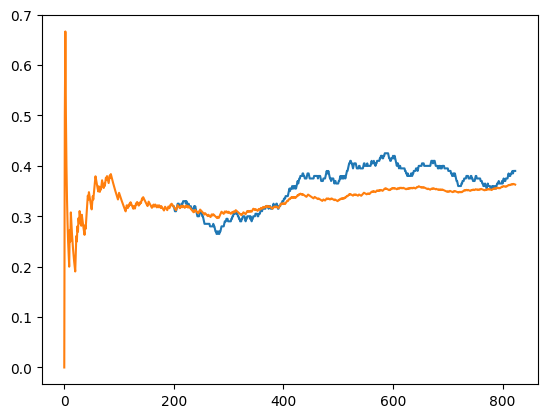

In [11]:
df = get_ratings_25m()


def distr(weights, gamma=0.0):
    weight_sum = float(sum(weights))
    return tuple((1.0 - gamma) * (w / weight_sum) + (gamma / len(weights)) for w in weights)

def draw(probability_distribution, n_recs=1):
    arm = choice(df.movieId.unique(), size=n_recs,
        p=probability_distribution, replace=False)
    return arm

def update_weights(weights, gamma, movieId_weight_mapping, probability_distribution, actions):
    # iter through actions. up to n updates / rec
    if actions.shape[0] == 0:
        return weights
    for a in range(actions.shape[0]):
        action = actions[a:a+1]
        weight_idx = movieId_weight_mapping[action.movieId.values[0]]
        estimated_reward = 1.0 * action.liked.values[0] / probability_distribution[weight_idx]
        weights[weight_idx] *= math.exp(estimated_reward * gamma / num_arms)
    return weights

def exp3_policy(df, history, t, weights, movieId_weight_mapping, gamma, n_recs, batch_size):
    '''
    Applies EXP3 policy to generate movie recommendations
    Args:
        df: dataframe. Dataset to apply EXP3 policy to
        history: dataframe. events that the offline bandit has access to (not discarded by replay evaluation method)
        t: int. represents the current time step.
        weights: array or list. Weights used by EXP3 algorithm.
        movieId_weight_mapping: dict. Maping between movie IDs and their index in the array of EXP3 weights.
        gamma: float. hyperparameter for algorithm tuning.
        n_recs: int. Number of recommendations to generate in each iteration.
        batch_size: int. Number of observations to show recommendations to in each iteration.
    '''
    probability_distribution = distr(weights, gamma)
    recs = draw(probability_distribution, n_recs=n_recs)
    history, action_score = replay_score(history, df, t, batch_size, recs)
    weights = update_weights(weights, gamma, movieId_weight_mapping, probability_distribution, action_score)
    action_score = action_score.liked.tolist()
    return history, action_score, weights

# vv don't need this, should swap it out for the epsilon greedy initialization approach
# initialze history with 50% like rate, 8 ratings
# this avoids stddev errors and prioritizes exploration of new posts in early iterations
history = df.groupby('movieId').first()
history['movieId'] = history.index
history['t'] = 0
history.index = history['t']
history['liked'] = 1
history = history[df.columns] # reorder columns to match logged data
history2 = history.copy()
history2['liked'] = 0
history = history.append(history)
history = history.append(history2)
history = history.append(history2)
history = history.append(history)
#history = history.append(history)
#history = history.append(history)


rewards = []
num_arms = df.movieId.unique().shape[0]
max_time = df.shape[0] # total number of ratings to evaluate using the bandit
weights = [1.0] * df.movieId.unique().shape[0] # initialize one weight per arm
movieId_weight_mapping = dict(map(lambda t: (t[1], t[0]), enumerate(df.movieId.unique())))
i = 1
for t in range(max_time//batch_size): #df.t:
	t = t * batch_size
	history, action_score, weights = exp3_policy(df, history, t, weights, movieId_weight_mapping, 0.1, 5, batch_size)
	rewards.extend(action_score)





# text = ['batch_size, slate_size, gamma, min_reviews_per_movie, mean_reward, sum_reward, num_trials',
#          '{}, {}, {}, {}, {}, {}, {}'.format(args.batch_size, args.n, args.gamma, args.min_review_count, np.mean(rewards), np.sum(rewards), len(rewards))]

# with open(full_filename + '.csv','w') as file:
#     for line in text:
#         file.write(line)
#         file.write('\n')

# with open(full_filename + '_raw.csv','w') as file:
# 	file.write(str(rewards))

cumulative_avg = np.cumsum(rewards) / np.linspace(1, len(rewards), len(rewards))
plt.plot(pd.Series(rewards).rolling(200).mean(), label='epsilon')
plt.plot(cumulative_avg, label='epsilon')

### Please answer the questions below to complete the experiment:




In [12]:
#@title Which of the following is NOT a property of the UCB algorithm? { run: "auto", form-width: "500px", display-mode: "form" }
Answer = "It always selects the arm with the highest expected reward" #@param ["", "It always selects the arm with the highest expected reward", "It may explore suboptimal arms in the early stages", "It is asymptotically optimal", " It is computationally efficient"]

In [13]:
#@title How was the experiment? { run: "auto", form-width: "500px", display-mode: "form" }
Complexity = "Good and Challenging for me" #@param ["","Too Simple, I am wasting time", "Good, But Not Challenging for me", "Good and Challenging for me", "Was Tough, but I did it", "Too Difficult for me"]


In [14]:
#@title If it was too easy, what more would you have liked to be added? If it was very difficult, what would you have liked to have been removed? { run: "auto", display-mode: "form" }
Additional = "good and challenging" #@param {type:"string"}


In [15]:
#@title Can you identify the concepts from the lecture which this experiment covered? { run: "auto", vertical-output: true, display-mode: "form" }
Concepts = "Yes" #@param ["","Yes", "No"]


In [16]:
#@title  Text and image description/explanation and code comments within the experiment: { run: "auto", vertical-output: true, display-mode: "form" }
Comments = "Very Useful" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [17]:
#@title Mentor Support: { run: "auto", vertical-output: true, display-mode: "form" }
Mentor_support = "Very Useful" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [18]:
#@title Run this cell to submit your notebook for grading { vertical-output: true }
try:
  if submission_id:
      return_id = submit_notebook()
      if return_id : submission_id = return_id
  else:
      print("Please complete the setup first.")
except NameError:
  print ("Please complete the setup first.")

Your submission is successful.
Ref Id: 805
Date of submission:  04 May 2024
Time of submission:  06:58:05
View your submissions: https://aias-iisc.talentsprint.com/notebook_submissions
